In [118]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd

In [119]:
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [120]:
df.columns = ['Date', 'Number of Passengers']
df.head()

,Date,Number of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


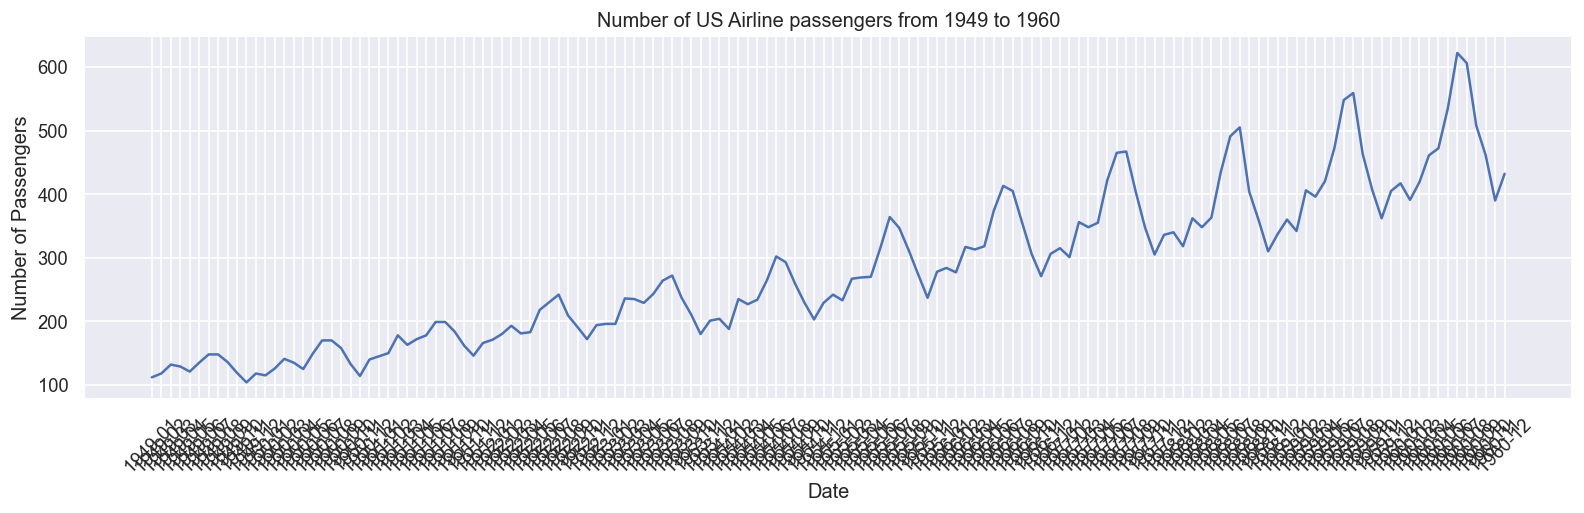

In [121]:
plt.figure(figsize=(16, 4))
plt.xticks(rotation=45)
plt.gca().set(xlabel='Date', ylabel='Number of Passengers')
plt.title(label='Number of US Airline passengers from 1949 to 1960')
plt.plot(df['Date'], df['Number of Passengers'])

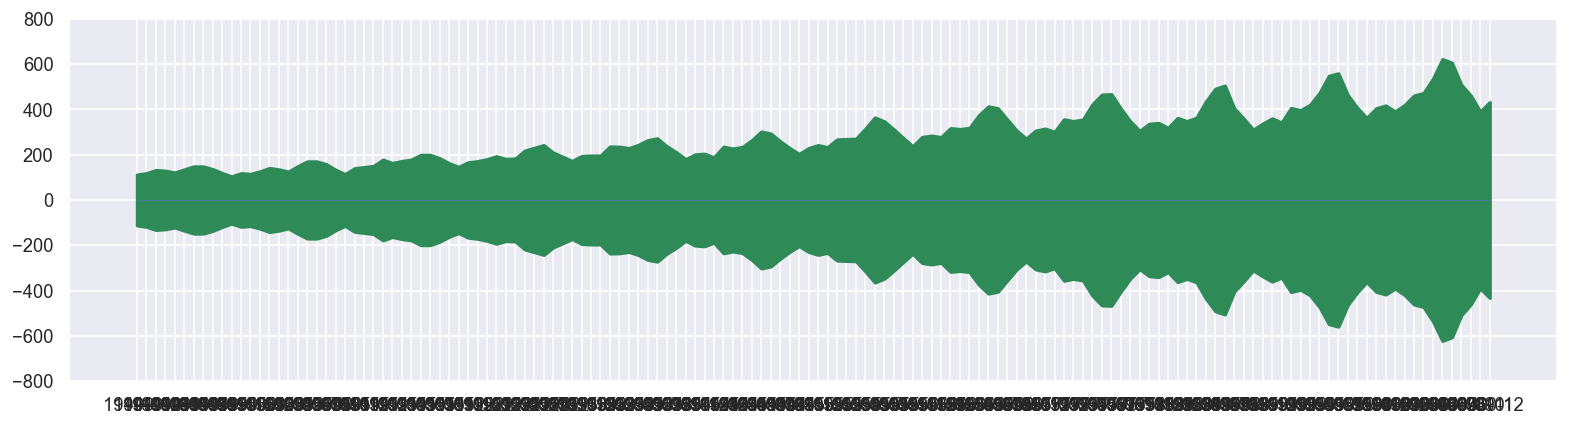

In [122]:
plt.figure(figsize=(16, 4))
plt.fill_between(df['Date'], y1=df['Number of Passengers'], y2=-df['Number of Passengers'], linewidth=2, color='seagreen')
plt.ylim(-800, 800)
plt.hlines(y=0, xmin=np.min(df['Date']), xmax=np.max(df['Date']), linewidth=0.5)
plt.show()

### Time-series decomposition

In [123]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

##### Multiplicative decomposition
$$ Value = Base Level * Trend * Seasonality * Error $$

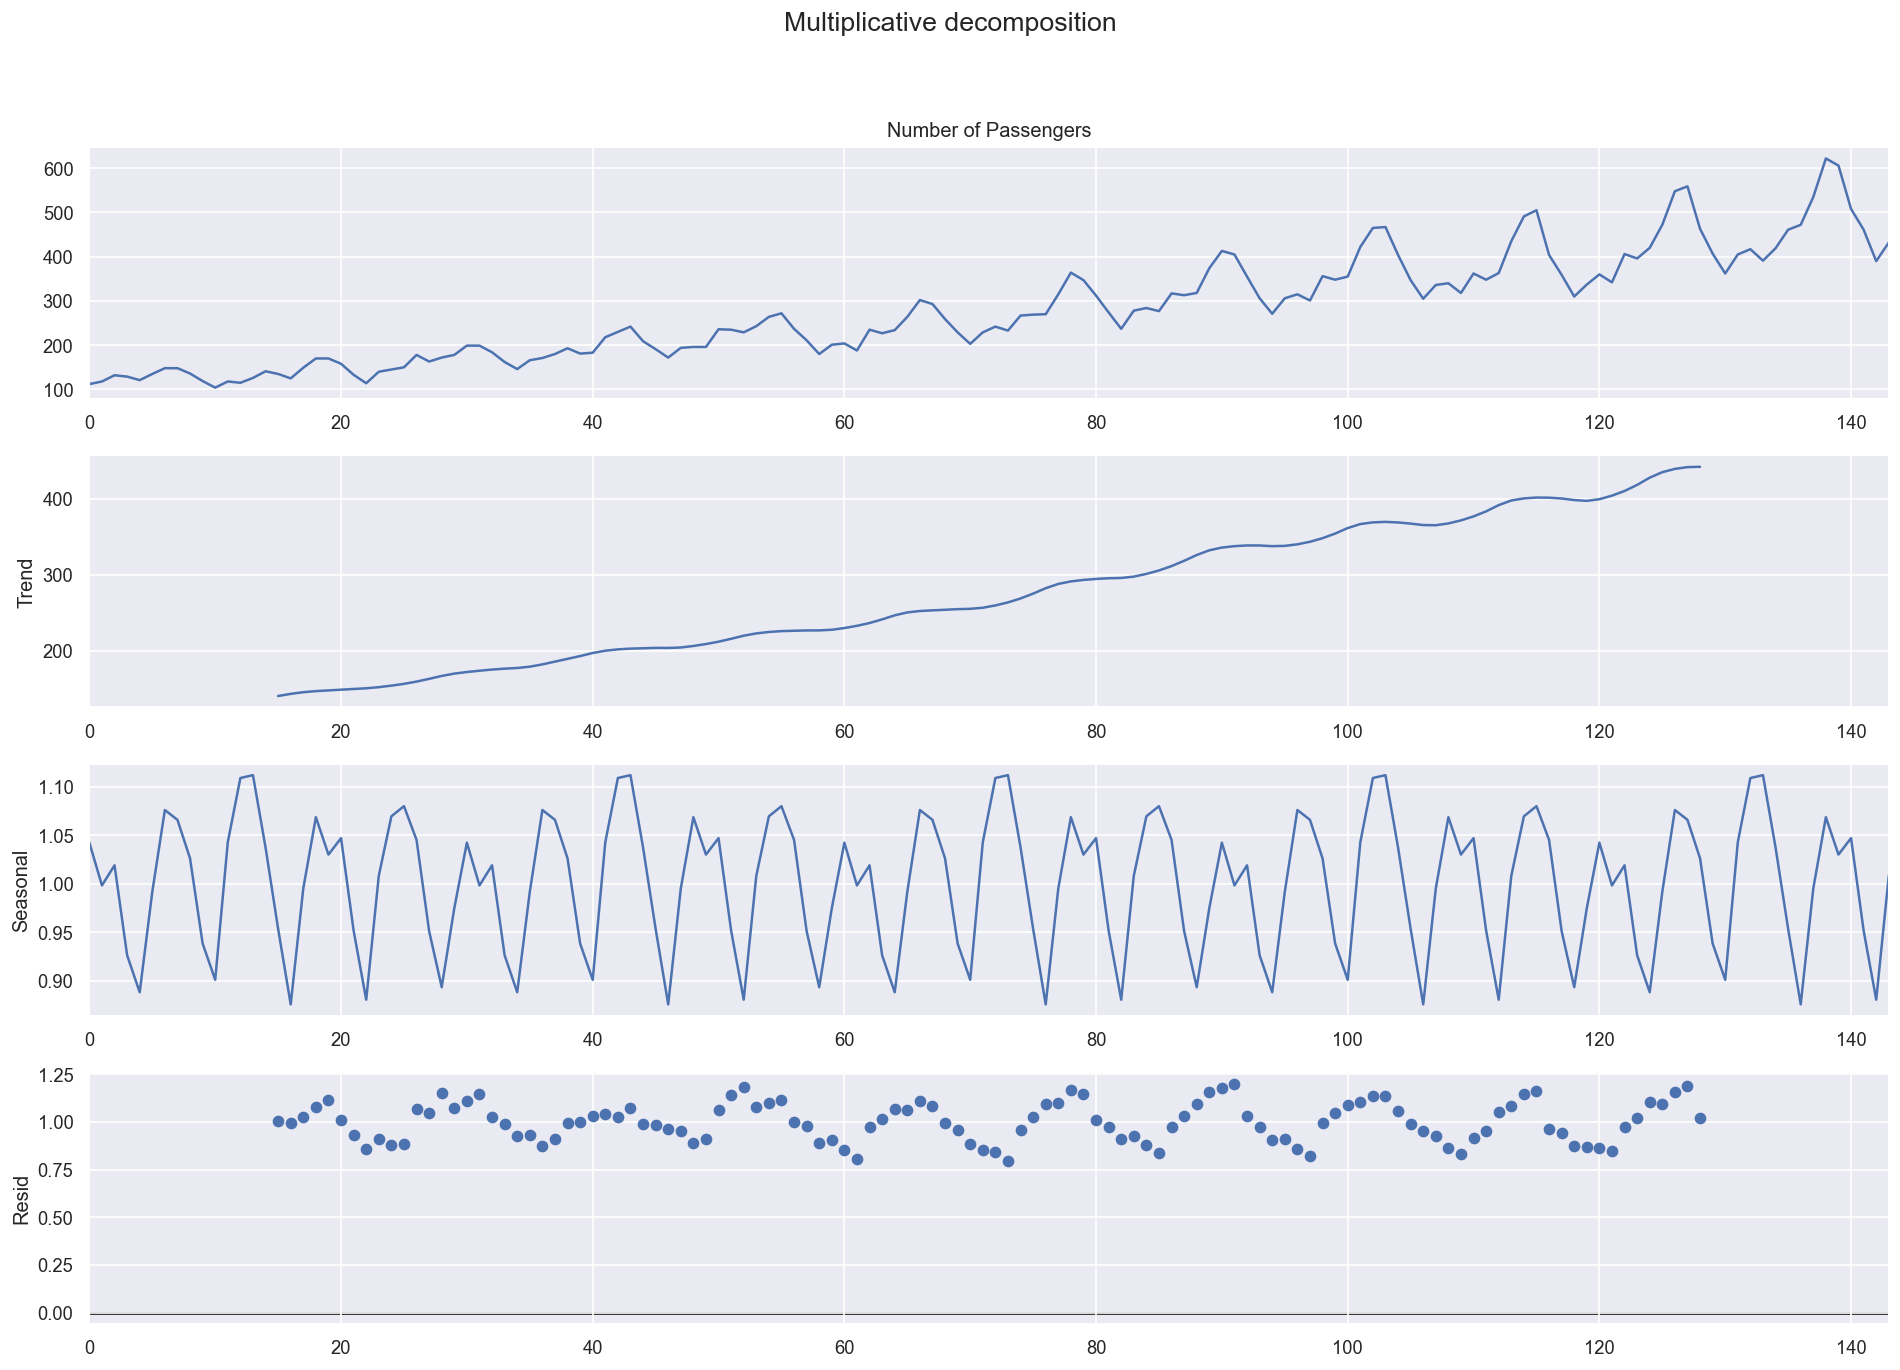

In [124]:
multiplicative_decomposition = seasonal_decompose(x=df['Number of Passengers'], model='multiplicative', period=30)
plt.rcParams.update({'figure.figsize': (16, 12)})
multiplicative_decomposition.plot().suptitle('Multiplicative decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

##### Additive decomposition

$$ Value = BaseLevel + Trend + Seasonality + Error $$

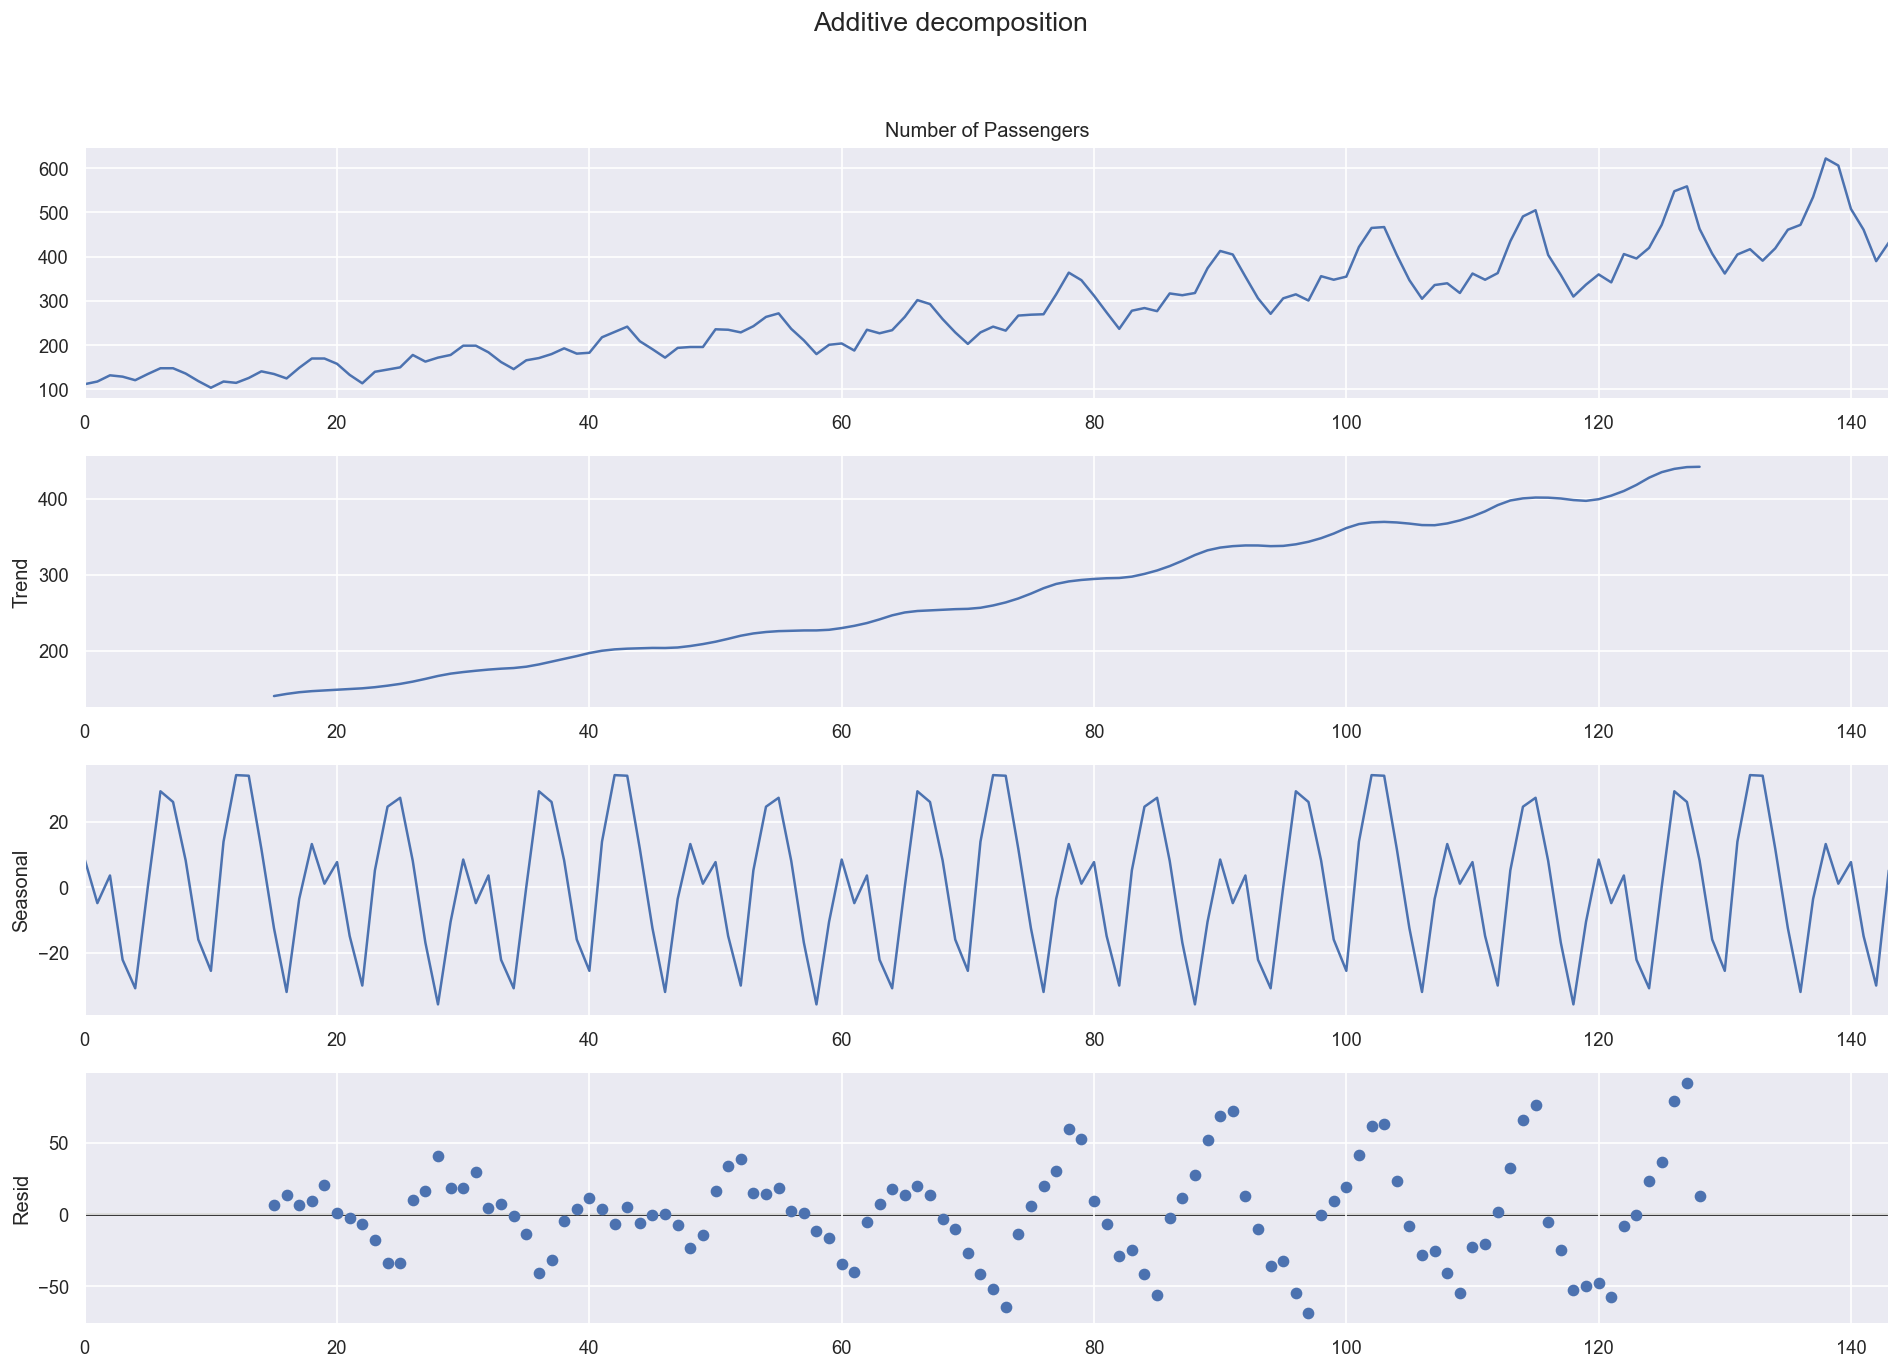

In [125]:
additive_decomposition = seasonal_decompose(x=df['Number of Passengers'], model='additive', period=30)
plt.rcParams.update({'figure.figsize': (16, 12)})
additive_decomposition.plot().suptitle('Additive decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Stationarity analysis

#### Augmented Dickey-Fuller Test

In [126]:
from statsmodels.tsa.stattools import adfuller
X = df['Number of Passengers']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Passengers', ylabel='Density'>

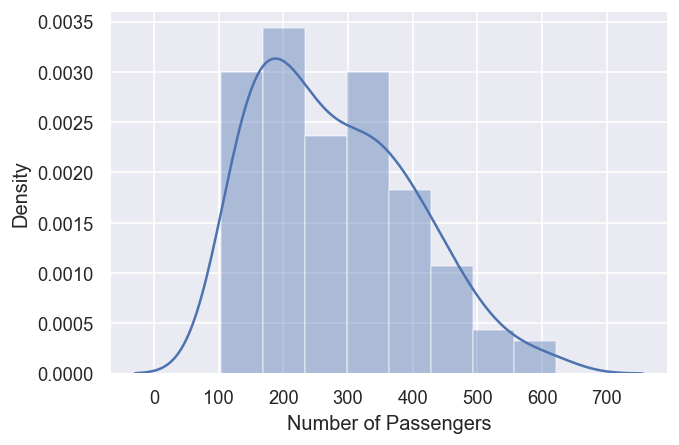

In [127]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(df['Number of Passengers'])

In [128]:
df['Number of Passengers'] = np.log(df['Number of Passengers'])
X = df['Number of Passengers']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


c:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Passengers', ylabel='Density'>

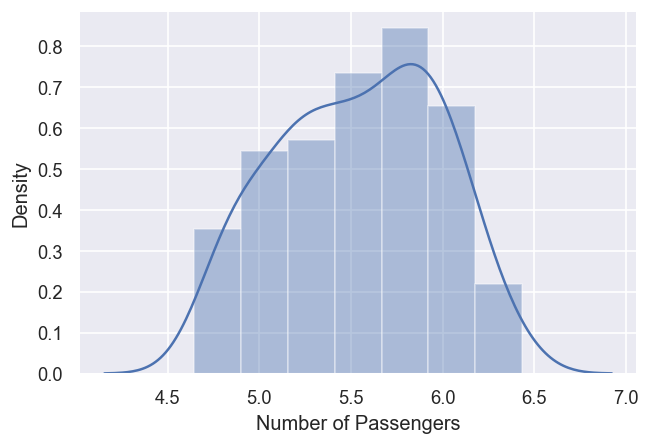

In [129]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(df['Number of Passengers'])

### Detrending

Text(0.5, 1.0, 'Air Passengers detrended by subtracting the least squares fit')

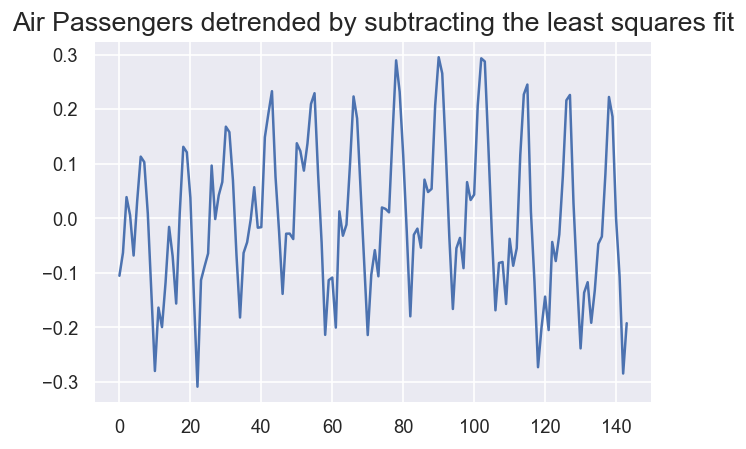

In [130]:
from scipy import signal
detrended = signal.detrend(df['Number of Passengers'].values)
plt.plot(detrended)
plt.title('Air Passengers detrended by subtracting the least squares fit', fontsize=16)

### Seasonality analysis

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

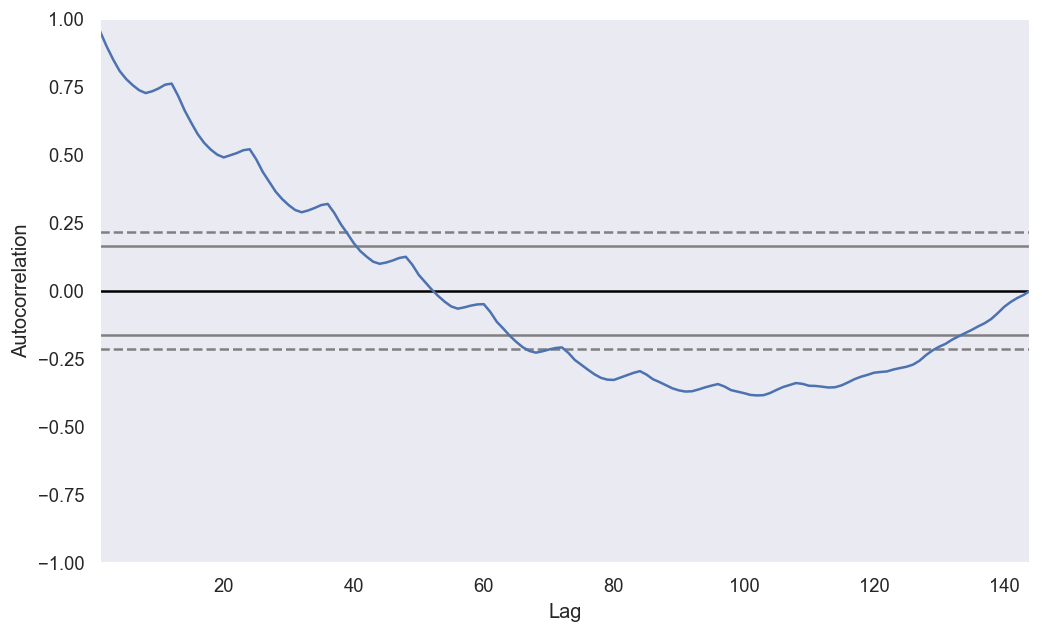

In [131]:
from pandas.plotting import autocorrelation_plot
plt.rcParams.update({'figure.figsize': (10, 6), 'figure.dpi': 120})
autocorrelation_plot(df['Number of Passengers'].tolist())

### Correlation analysis

#### Autocorrelation

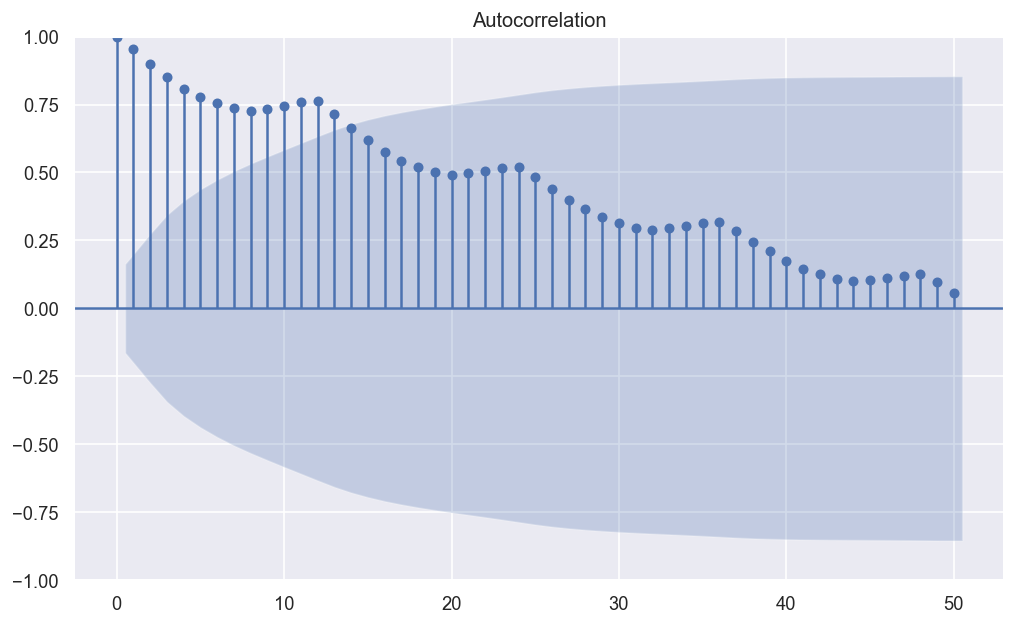

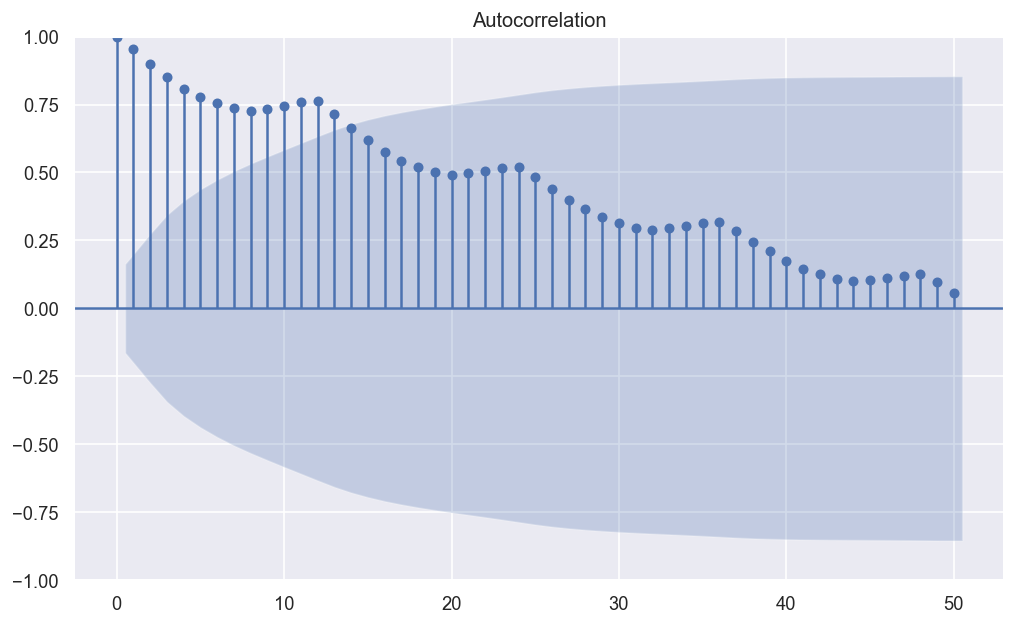

In [132]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Number of Passengers'].tolist(), lags=50)

#### Parital autocorrelation

c:\Users\User\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


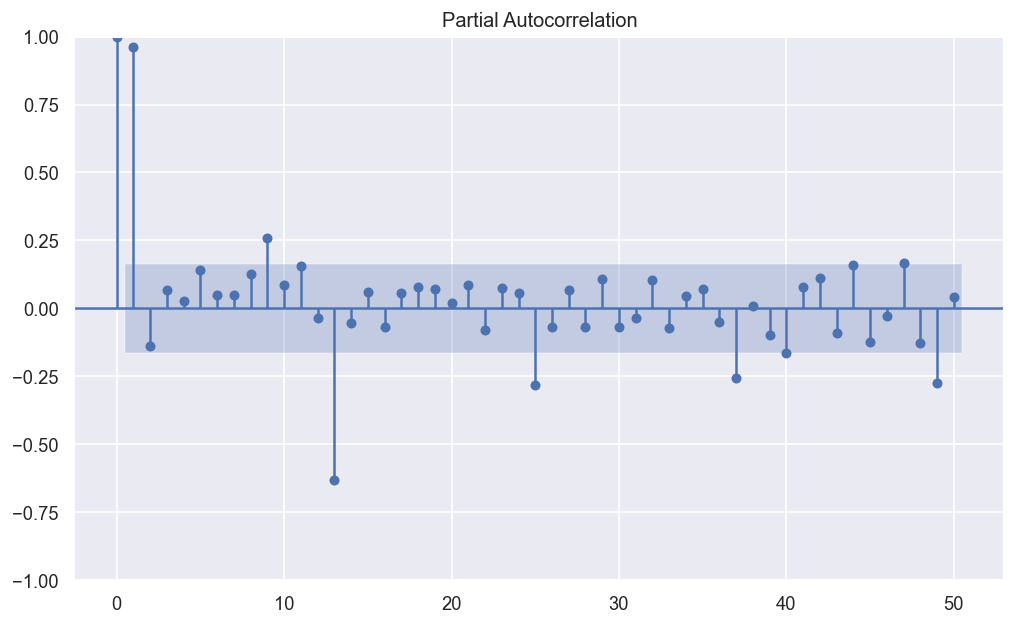

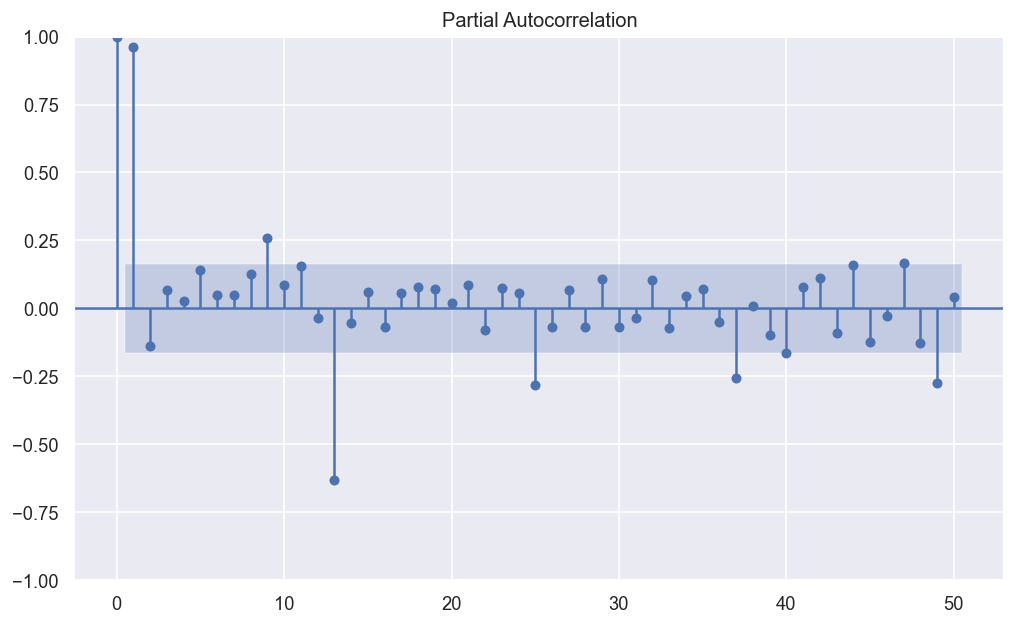

In [133]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df['Number of Passengers'].tolist(), lags=50)